# Linear regression with prior

Let's say we have a prior on the linear model, i.e. we start with a known W (W_prior) and b (b_prior). Further, we say that the learnt function can be such that:

$$W = \alpha \times W_{prior}$$
$$b = \beta + b_{prior}$$

Our task reduces to learn $\alpha$ and $\beta$. This can be solved as we would usually do using Gradient descent, the only difference being that we will compute the gradient wrt $\alpha$ and $\beta$.

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### True model  

$Y = 10 X + 6$

In [2]:
np.random.seed(0)
n_samples = 50
X = np.linspace(1, 50, n_samples)
Y = 10*X + 6 + 10*np.random.randn(n_samples)

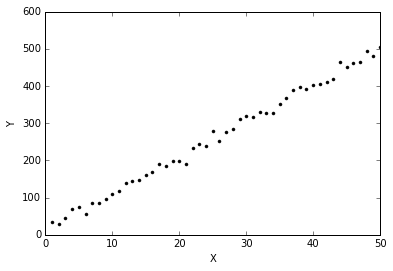

In [3]:
plt.plot(X, Y, 'k.')
plt.xlabel("X")
plt.ylabel("Y")

### Defining priors (bad ones!)

In [4]:
w_prior = -2
b_prior = 2

### Defining the cost function in terms of alpha and beta

In [5]:
def cost(alpha, beta):
    pred = np.dot(X, alpha*w_prior) + b_prior + beta
    return np.sqrt(((pred - Y) ** 2).mean(axis=None))

from autograd import grad, multigrad
grad_cost= multigrad(cost, argnums=[0, 1])

### Gradient descent

In [6]:
alpha = np.random.randn()
beta = np.random.randn()
lr = 0.001
for i in range(1001):
    
    del_alpha, del_beta = grad_cost(alpha, beta)
    alpha = alpha - del_alpha*lr
    beta = beta - del_beta*lr
    if i%200==0:
        print "*"*20
        print i
        print "*"*20
    
        print cost(alpha, beta), alpha*w_prior, beta+b_prior

********************
0
********************
239.72247555 1.90798852161 2.3877840568
********************
200
********************
12.0792199541 10.0763477733 2.48338003162
********************
400
********************
12.0671190561 10.0748865792 2.53257009392
********************
600
********************
12.0550910217 10.0734297908 2.58161183822
********************
800
********************
12.0431356284 10.0719774081 2.63050526935
********************
1000
********************
12.0312526521 10.0705294308 2.67925039569


We are able to learn a reasonably accurate W=10.07 and b=2.7. 